In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import unicodecsv
%matplotlib inline

What factors affected survival on the Titanic?

I will examine Age, Class and Sex. My analysis will look at the Survival rate for these groups, both individually and combined, and I will attempt to explore any interesting relationships between these variables.

WRANGLING

The dataset contains 891 passengers. However a significant number of passengers did not have an age recorded. There are two ways of dealing with this - the would be to retain all records and analyse Sex and Class variables initially. Then wrangle the data to drop the entries with no age value returned so that the dataset would play nicely with the Age analysis. Different plotting methods respond to NaN values differently, strictly speaking there isn't a need to drop the NaN values from the dataframe as the plotting method could (depending on which is used) drop NaNs for me anyway.

However in the interests of clarity, consistency and readability (ie not having to constantly remind the reader that we are dealing with a subset of the data at each juncture) I opted to drop the records that had no Age value completely from my analysis at the start. This ensured that all my subsequent graphs and discussion relate specifically to the same dataset - clarity and readability of the results is thus improved. Whoever uses this report can be sure that any graph or output drawn from it is referring to the same sample.

The disadvantage is that this reduces the sample size slightly which means that my class and sex explorations will be less comprehensive than they could be, however I don't think that this is likely to meaningfully impact my exploration.
Strictly speaking I could investigate this and compare how the survival rate for each sex and class variable changed in the NaN Age Included sample versus the Age Dropped sample however I chose not to do so firstly on the grounds that this would be of little interest to the intended audience and secondly I have to draw the line somewhere.

There is also (as discussed below) the potential to skew the analysis if non recording of age was caused by lurking variables that disproportionately influenced members of one of the groups I am looking at.

In [2]:
titanicdata_df = pd.read_csv('titanic-data.csv')

In [3]:
#remove extraneous ( to me) columns
titanicdf_2 = titanicdata_df[['PassengerId', 'Pclass','Survived', 'Sex', 'Age', 'Fare']]
#remove all entries with a null value (for age) - reduces sample size to 714
titanicdf_3 = titanicdf_2.dropna(axis=0)

I want to create a new categorical variable based on the existing Pclass variable in order to represent in the data the abstraction that the ticket class of the passenger represents their Socioeconomic status. Like any proxy this is a potential source of error, but it appears to be generally accepted.

In [4]:
#create a function that gives a new column "Social" based on ticket class
def getclass(val):
    if  val == 1:
        return 'Upper'
    elif val == 2:
        return 'Middle'
    elif val == 3:
        return 'Lower'
    
titanicdf_3.is_copy = False

    
titanicdf_3['Social'] = titanicdf_3.loc[:,'Pclass'].apply(getclass)

In [5]:
#create new column of categorical variables based on age.
def cutage(df):
   return pd.cut(df,[0, 5, 13, 19, 25, 50, 65, 100], labels=['Infant', 'Child', 'Teen', 'Yadult', 'Adult', 'Old', 'Ancient'])
                                
titanicdf_3['Agecat'] = titanicdf_3[['Age']].apply(cutage)

titanicdf_3.head(2)

,PassengerId,Pclass,Survived,Sex,Age,Fare,Social,Agecat
0,1,3,0,male,22.0,7.2500,Lower,Yadult
1,2,1,1,female,38.0,71.2833,Upper,Adult


INITIAL OBSERVATIONS

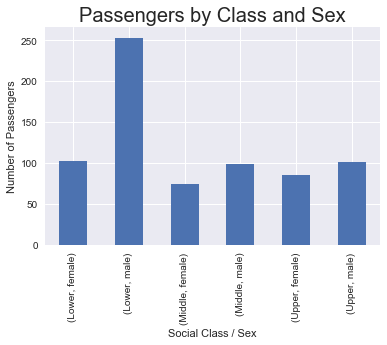

In [6]:

gb1 = titanicdf_3.groupby(['Social','Sex'])['PassengerId'].count()
p = gb1.plot.bar()
p.set_title("Passengers by Class and Sex", fontsize=20)
p.set_ylabel("Number of Passengers")
p.set_xlabel("Social Class / Sex")

The main takeaway from this graph is that by far the biggest category of passenger on the ship was Lower class Males. The sample indicates that the overall size of the Middle and Uppder class passenger categories was roughly similar, with a similar proportion of females to males. This proportion does not hold for Lower class, where we see a lot more men.

It should be noted that as we have expunged the records for which no age was recorded, this could skew our sample. For example, the Lower classes may have had higher rates of illiteracy or the admin personel charged with recording the ages of the passenger might not have been as diligent for less distinguished passengers. The direction could be the other way - a glower from an impatient titan of industry might have encouraged the admin staff to skip the formalities, for example.

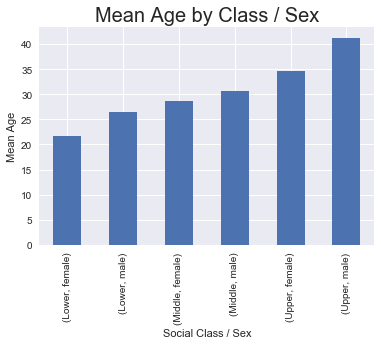

In [7]:
gb2 = titanicdf_3.groupby(['Social','Sex'])['Age'].mean()
p2 = gb2.plot.bar()
p2.set_title("Mean Age by Class / Sex", fontsize = 20)
p2.set_ylabel("Mean Age")
p2.set_xlabel("Social Class / Sex")


Mean age was highest for first class males and lowest for third class females. Within each class, the mean age for males was greater than for females. Interestingly, the class effect would appear to be stronger than the sex effect as the mean age for females of a certain class is higher than that of males of any lower class. 

It might be possible to investigate this using r2 however as the output variable Age isn't really of interest (i would rather look at the various factors and their impact on survival) I will leave it as an interesting observation.

I intend to delve a bit deeper into age later on.

SEX & DEATH

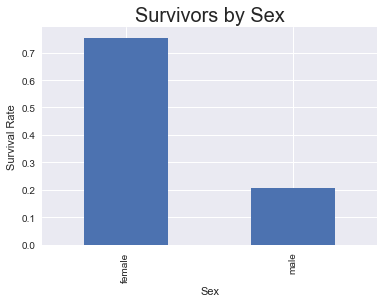

In [8]:
gb3 = titanicdf_3.groupby('Sex')['Survived'].mean()
p4 = gb3.plot.bar()
p4.set_title("Survivors by Sex", fontsize=20)
p4.set_ylabel("Survival Rate")
p4.set_xlabel("Sex")


CLASS & DEATH

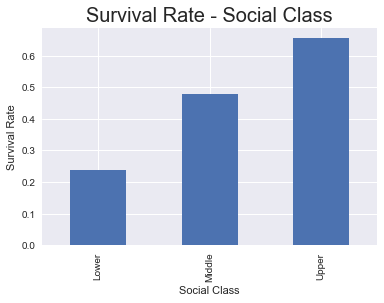

In [9]:
gb4 = titanicdf_3.groupby('Social')['Survived'].mean()
p4 = gb4.plot.bar()
p4.set_title("Survival Rate - Social Class", fontsize=20)
p4.set_ylabel("Survival Rate")
p4.set_xlabel("Social Class")

SEX & CLASS & DEATH

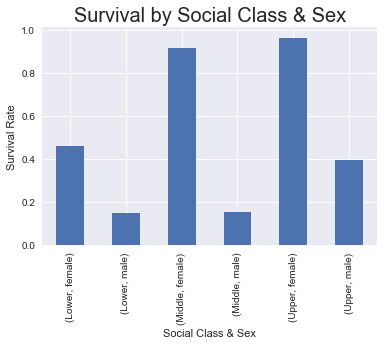

In [10]:
gb5= titanicdf_3.groupby(['Social', 'Sex'])['Survived'].mean()
p3 = gb5.plot.bar()
p3.set_title("Survival by Social Class & Sex", fontsize=20)
p3.set_ylabel("Survival Rate")
p3.set_xlabel("Social Class & Sex")

As 1 = survived and 0 = did not survive, simply taking the mean of Survived will return the survival proportion applicable to that group.

Survival was much higher for women than men within each class category.
Survival was also higher based on class.

However the Sex effect appears to be much more important than class alone - although first class men fared much better than their male counterparts, a higher proportion of third class women survived.
Based on this sample, less than one in five Middle and Lower class men survived.

For men, if you were upper class your survival rate was more than double your Lower / Middle class equivalents.

Women in the Upper and Middle class brackets had survival rates of more than 90%, whereas less than 50% of lower class women survived.

This gives us an interesting insight into the interaction between survival rate, gender and class. The data suggests that if you're a man on the titanic, the most important class distinction for your survival is whether or not you're upper class. However if you were a woman, the main thing is to not be Lower class.

AGE

In [11]:
#create a function that gives a new column "SurvH" based on 1 or 0 in Survived Column
def getsurvH(val):
    if  val == 1:
        return 'Survived'
    elif val == 0:
        return 'Died'
      
titanicdf_3.is_copy = False
 
titanicdf_3['SurvH'] = titanicdf_3.loc[:,'Survived'].apply(getsurvH)

titanicdf_3.head(2)

,PassengerId,Pclass,Survived,Sex,Age,Fare,Social,Agecat,SurvH
0,1,3,0,male,22.0,7.2500,Lower,Yadult,Died
1,2,1,1,female,38.0,71.2833,Upper,Adult,Survived


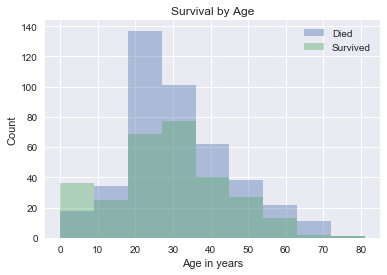

In [12]:
gb6 = titanicdf_3.groupby('SurvH')['Age']
gb6.plot.hist(title="Survival by Age", legend="True", alpha=0.4, bins=[0,9,18,27,36,45,54,63,72,81])
plt.xlabel('Age in years')
plt.ylabel('Count')
plt.show()


This graph shows the number of survivors in each age bracket in green, with the corresponding number of deaths in blue.

I chose my bin sizes based partially on my intended definitions of Child / Adult / Elderly. I was going to define a Child as anyone under 18 and an Elderly as anyone over 63 - this neatly corresponds with the first and last two bars.The only age group where survivors outnumbered deaths was for the under 9s. Under my definition of Child, the death and survival rates would be about equivalent, and this insight would be missed.Therefore I refined this approach and used more useful definitions as described below.

Infant - 0 to 5 years old
Child - 5 to 13
Teen - 13 to 19
Young Adult 19 to 25
Adult 25 to 50
Old 50 to 65
Ancient 65 and above


A quick method to show this just by adjusting the binsize to match the categories.


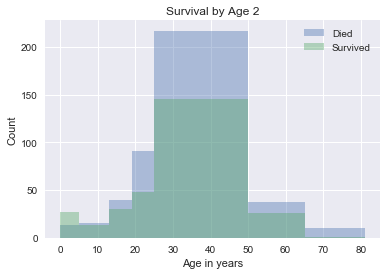

In [13]:
gb6.plot.hist(title="Survival by Age 2", legend="True",alpha=0.4,bins=[0,5,13,19,25,50,65,81])
plt.xlabel('Age in years')
plt.ylabel('Count')


Mapping to Age Category from left to right;

Infant - 0 to 5 years old
Child - 5 to 13
Teen - 13 to 19
Young Adult 19 to 25
Adult 25 to 50
Old 50 to 65
Ancient 65 and above

Noticeable observations - Only infants had a survival rate over 50%. Most of those in the Adult category drowned.

This would be clearer as a bar graph where the new categorical age variables were used however I think that doing a histogram initially proved to be of some value as it helped me define meaningful variables and allowed me to spot a patttern in the data that might have been missed otherwise.

Note - for clarity (to keep all the wrangling together) I have moved the code that sorts the passengers into specific Age Categories based on the their Age in years to the top.



VIOLIN PLOTS

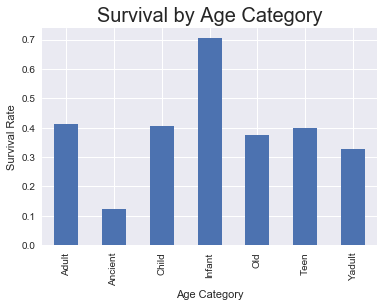

In [14]:
x= titanicdf_3.groupby('Agecat')['Survived'].mean()
v= x.plot.bar()
v.set_title("Survival by Age Category", fontsize=20)
v.set_ylabel("Survival Rate")
v.set_xlabel("Age Category")


Whilst this does allow us to see the survival proportion of survivorship for each category, the output is not ideal. To help visualise the relevant points I will use Seaborn.

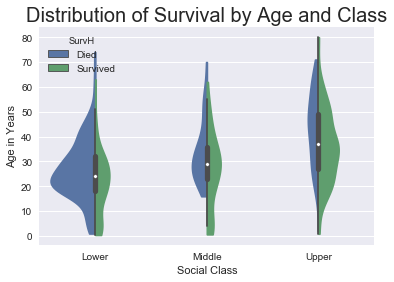

In [15]:
vp1 = sns.violinplot(data = titanicdf_3, x='Social', y='Age', hue='SurvH', cut = 0, scale='count', scale_hue=False, split=True, order=['Lower','Middle','Upper'])
vp1.set_title("Distribution of Survival by Age and Class", fontsize=20)
vp1.set_ylabel("Age in Years")
vp1.set_xlabel("Social Class")

Here we can get a sense of the dynamics at work between class and survival by viewing how the age of survivors and casualties is distributed. The most obvious and significant observation is the number of deaths for Lower class passengers.

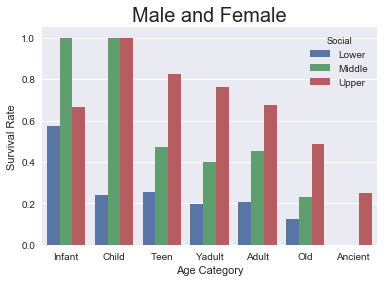

In [16]:
ax = sns.barplot(x="Agecat", y="Survived", hue="Social", data=titanicdf_3, order=['Infant', 'Child', 'Teen','Yadult','Adult', 'Old', 'Ancient'],hue_order=['Lower','Middle','Upper'], ci=None)
ax.set_title("Male and Female", fontsize=20)
ax.set_ylabel("Survival Rate")
ax.set_xlabel("Age Category")

In [17]:
#The position for men and women can be shown by removing the relevant values from the dataframe
mendf = titanicdf_3[titanicdf_3['Sex']== 'male']
womdf = titanicdf_3[titanicdf_3['Sex']== 'female']


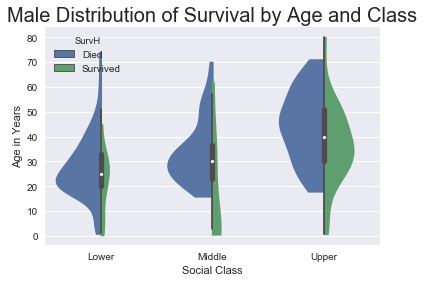

In [18]:
vpm = sns.violinplot(data = mendf, x='Social', y='Age', hue='SurvH', scale='count', cut = 0, scale_hue=True, split='True', order=['Lower','Middle','Upper'])
vpm.set_title("Male Distribution of Survival by Age and Class", fontsize=20)
vpm.set_ylabel("Age in Years")
vpm.set_xlabel("Social Class")

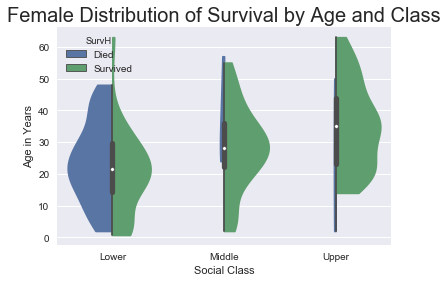

In [19]:
vpf = sns.violinplot(data = womdf, x='Social', y='Age', cut = 0, hue='SurvH', hue_order=['Died','Survived'], scale='count', scale_hue=True, split='True', order=['Lower','Middle','Upper'])
vpf.set_title("Female Distribution of Survival by Age and Class", fontsize=20)
vpf.set_ylabel("Age in Years")
vpf.set_xlabel("Social Class")

As can be seen by the resulting outputs, the violinplot method starts to break down and produce nonsensical estimates once the number of observations in each subgroup falls below a certain point. As a result I had to use Cut to prevent this, which unfortunately has impacted the aesthetics somewhat. Because I've used "count" the area between the outside and the internal Y axis of each violin actually relates to the size of the sample.As a result I'd say that the plots serve their intended purpose: to provide a high level , intuitive map of survivorship that gives us the broad picture.

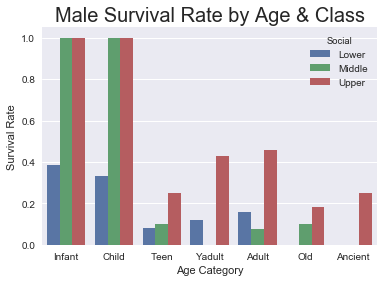

In [20]:
P = sns.barplot(x="Agecat", y="Survived", hue="Social", data=mendf, order=['Infant', 'Child', 'Teen','Yadult','Adult', 'Old', 'Ancient'],hue_order=['Lower','Middle','Upper'], ci=None)

P.set_title ("Male Survival Rate by Age & Class", fontsize=20)
P.set_ylabel("Survival Rate")
P.set_xlabel("Age Category")

One thing that jumps out in this case is the relative increase in survivorship for Lower class adults over Middle class adults. This could be down to social factors such as the middle classes being more conscious of the women and children first rule, or it could be due to the fact that the data counts crew as PClass 3. There is also a massive discrepancy n the survival rates for the Infant and Child categories based on class, which would perhaps imply that circumstances dictated that these particular children were unable to benefit from the same social mores that saved 100% of their wealthier counterparts. From my reading on the subject, the most likely explanation is that this was because they were locked behind bulkheads.

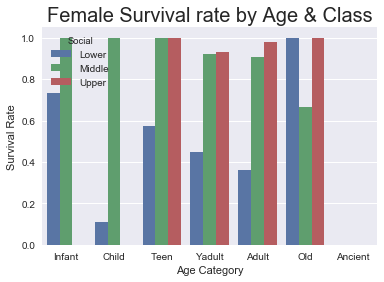

In [21]:
w = sns.barplot(x="Agecat", y="Survived", hue="Social", data=womdf, order=['Infant', 'Child', 'Teen','Yadult','Adult', 'Old', 'Ancient'],hue_order=['Lower','Middle','Upper'], ci=None)
w.set_title ("Female Survival rate by Age & Class", fontsize=20)
w.set_ylabel("Survival Rate")
w.set_xlabel("Age Category")


Interestingly, the sample does not appear to include any upper class female passengers under the age of 13. No female passengers over age 65 were present in the data.

Older women in the Middle class bracket showed a lower survival rate than their Lower class counterparts - this is slightly odd and could again hint at some other lurking variable.

The survival rate for third class female children is amongst the lowest of any subgroup. This is in stark contrast to their middle class female peers but also noticeably lower than their male counterparts, whose survival rate (whilst low in relation to middle / upper class children) was about three times higher. I can't think of a logical explanation for this - if I had to speculate I'd say perhaps it could have something to do with the way they dressed. Given that relatively few Lower class children made it to the lifeboats, I would expect that, all other things being equal, the subgroup unburdened by absorbent and heavy petticoats would have a survival advantage. This is just speculation but could form an investigation point.

In [22]:
#produce correlation output
mendf.corr()

,PassengerId,Pclass,Survived,Age,Fare
PassengerId,1.000000,0.006360,0.060183,0.006191,-0.018166
Pclass,0.006360,1.000000,-0.221893,-0.392754,-0.486482
Survived,0.060183,-0.221893,1.000000,-0.119618,0.183421
Age,0.006191,-0.392754,-0.119618,1.000000,0.077331
Fare,-0.018166,-0.486482,0.183421,0.077331,1.000000


Most of the above table makes no sense however we can see that for men, Age and Survival are negatively correlated (-0.12) and that Fare and Survival are positively correlated (+0.18). Neither are particularly strong correlations however we can see that Fare is the most powerful. Unfortunately as the other variables I chose for my analysis are categorical I am unable to produce R2 values for them. (Using PClass wouldn't make sense, as whilst it is Numeric it would effectively triple count third class passengers, double count second etc - there may be a way to adjust for this however I was unable to locate anything in my search)

In [23]:
womdf.corr()

,PassengerId,Pclass,Survived,Age,Fare
PassengerId,1.000000,-0.116495,0.035052,0.085899,0.056655
Pclass,-0.116495,1.000000,-0.504753,-0.386217,-0.620238
Survived,0.035052,-0.504753,1.000000,0.116109,0.230962
Age,0.085899,-0.386217,0.116109,1.000000,0.171468
Fare,0.056655,-0.620238,0.230962,0.171468,1.000000


Similarly, for women we can see a positive but weak correlation between Fare and survivorship. This is slightly higher (+0.23) than for men however.
However contrary to the male results, Age is in fact a positive predictor (+0.12) of survivorship for women.

CONCLUSION

We explored the data and examined several peculiarities therein. The preconceptions I had going in to the analysis were that there would be significant differences in treatment between the classes/ sexes /  age groups, and I would say that this was validated by the investigation. 

The analysis was somewhat hampered by the lack of sample data in certain categories, as certain class / age / sex combinations were not well represented in the dataset.

As already discussed, the exclusion of the passengers with no recorded age could have an impact on the results depending on how this information was collected. This could have been checked to see if the distribution of age/sex/class in the noage group matched that in the age group however I chose not to do so.

The analysis is also of course reliant on the accuracy of the dataset itself. Although there are a couple of stories about certain Males dressing up as women to get on the boats, the assumption has been made that the people who survived were actually the age class and sex that they said they were.

However there were also some groups (in particular third class female children) who didn't seem to fit with the broader survivorship patterns and these patterns represent anomalies which, if investigated, could provide new insights into the disaster. As far as I am aware this is not something that has been explored.
